In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### 1. Read the data

In [27]:
train = pd.read_csv("train.csv")
data = train

In [28]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. The ndependent Variable 'SalePrice'

In [29]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


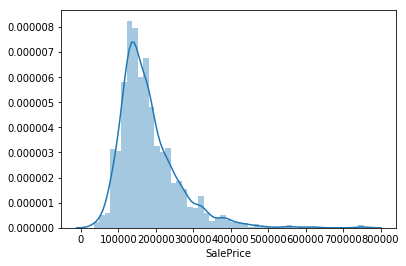

In [33]:
sns.distplot(data['SalePrice']);
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

The Salesprice seems to follow a normal distribution, but it has positive skewness and kurtosis

### 3. Correlation of 'SalePrice' and other variables

#### 3.1 Numerical variables

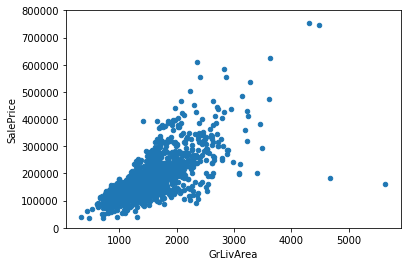

In [36]:
#'GrLivArea'
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

There is a positive liner relationship between GrLivArea and SalesPrice. 

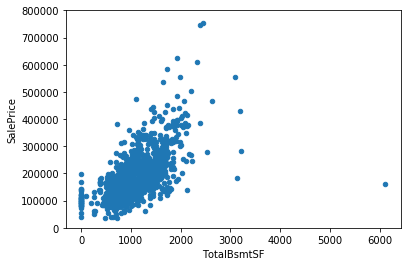

In [37]:
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

There is a positive relationship between GrLivArea and SalesPrice. The shape of the chart seems like either a liner or exponential relationship (ignoring outliners)

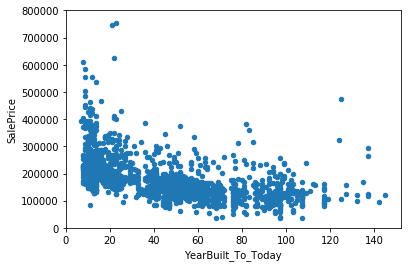

In [43]:
data['YearBuilt_To_Today'] = 2017 - data.YearBuilt
data.plot.scatter(x='YearBuilt_To_Today', y='SalePrice', ylim=(0,800000));

The YearBuilt is tricky. I tranformed it to YearBuilt_To_Today, so it's no longer a category value but a numeric value. 

#### Correlation matrix (heatmap style)

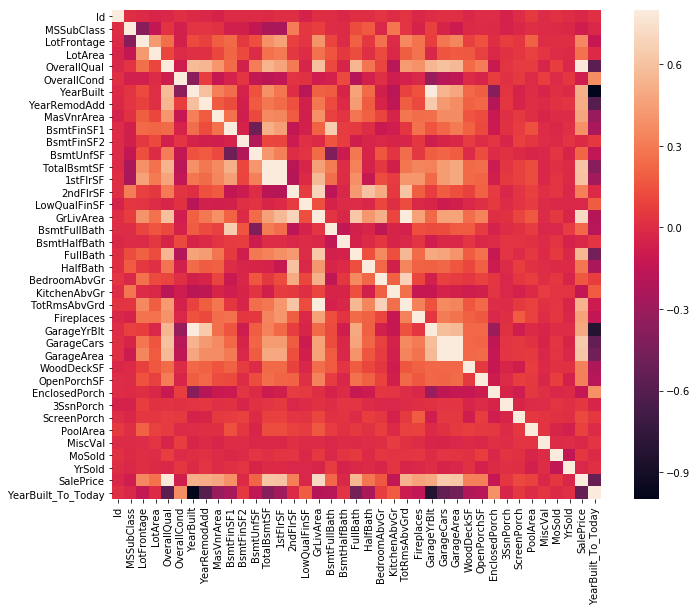

In [45]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

1. From the correlation matrix, we can see that "GarageCars" and "GarageArea" are significantly related to each other. So that we should only keep 1 of them in our model

2. Also, "TotalBsmtSF" and "1stFlrSf" are also highly related. We should not include both of them in the model. 